In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
N = 10
M = 5
xx = np.arange(N+1, dtype=np.float64)
yy = np.arange(M+1, dtype=np.float64)
x, y = np.meshgrid(xx, yy)
# b = N/20.0
# c = M/2.0
# r = np.sqrt(((x[:-1, :-1]-c)/b)**2 + (y[:-1, :-1]/b)**2)
# a = np.sin(r)
for i in range(len(x)):
    x[i, :] *= (1.0 + 0.1*i)
z = np.random.random([M, N])

<IPython.core.display.Javascript object>


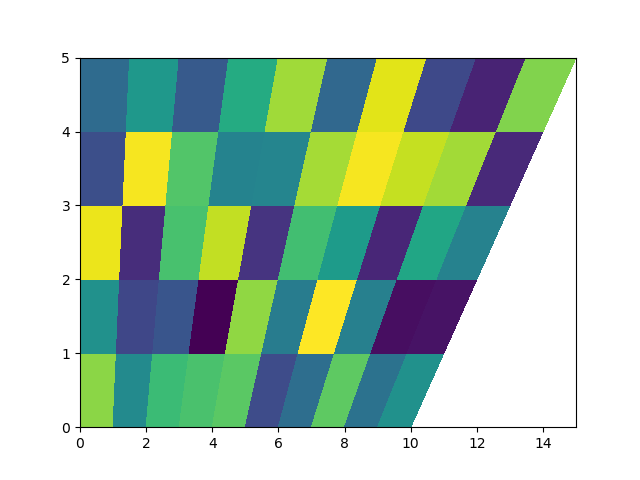

In [4]:
fig, ax = plt.subplots()
ax.pcolormesh(x, yy, z)

In [11]:
fig.canvas.toolbar._active

'ZOOM'

In [5]:
res = 256
nx = res
ny = res
xmin = 0.0
xmax = x[-1]
dx = (xmax - xmin)/float(nx)
xe = np.linspace(xmin, xmax, nx+1)
xc = np.linspace(xmin + 0.5*dx, xmax - 0.5*dx, nx)
ymin = 0.0
ymax = y[-1]
dy = (ymax - ymin)/float(ny)
ye = np.linspace(ymin, ymax, ny+1)
yc = np.linspace(ymin + 0.5*dy, ymax - 0.5*dy, ny)
xg, yg = np.meshgrid(xc, yc)

In [8]:
from scipy.interpolate import griddata
from scipy.stats import binned_statistic_2d

results, y_edges, x_edges, bin_number = binned_statistic_2d(
    x=y.ravel(), y=x.ravel(), values=[z.ravel()], statistic='mean', bins=[ye, xe])

subs = np.where(np.isfinite(results[0].ravel()))
points = np.transpose([xg.ravel()[subs], yg.ravel()[subs]])

AttributeError: The number of `values` elements must match the length of each `sample` dimension.